<a href="https://colab.research.google.com/github/SANTONLA/05-EJERCICIOS-PELICULAS/blob/main/trabajo_final_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![/content/logo.jpg](attachment:logo.jpg)

# Módulo 2: Machine Learning Aplicado

# Trabajo final

## Título: PROBLEMA DE ABANDONO DE CLIENTES DEL BANCO (CHURN CUSTOMERS)

## Alumno/s:  SILVIA ANTÓN


## Índice:
* [1. Selección del problema y motivación](#1)
* [2. Descripción del problema global](#2)
* [3. Objetivo ](#3)
* [4. Evaluación](#4)
* [5. Descripción de los datos disponibles](#5)
* [6. Desarrollo de la solución y experimentos realizados](#6)
* [7. Resumen de la solución y generalización del modelo](#7)
* [8. Líneas futuras](#8)


## 1. Selección del problema y motivación <a class="anchor" id="1"></a>

**Describe en este apartado las opciones que has valorado para el trabajo.**

El gerente de AdventureWorks  está preocupado porque cada vez más clientes abandonan sus servicios de tarjetas de crédito. Realmente agradecerían si se pudiera predecir quién es más probable que deje el servicio para que puedan acudir proactivamente al cliente para brindarle mejores servicios y cambiar las decisiones de los clientes en la dirección opuesta.

Obtuve este conjunto de datos de Kaggle sitio web con la URL. https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers debido a su alta puntuación en usabilidad y limpieza de los datos.


Ahora, este conjunto de datos consta de 10.000 clientes que mencionan su edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc. Hay casi 18 características.

Solo tenemos el 16,07% de los clientes que han abandonado. Por lo tanto, es un poco difícil entrenar nuestro modelo para predecir la rotación de clientes.

**Explica la motivación que te ha llevado a escoger el problema/trabajo seleccionado.**

Llevo trabajando algún tiempo ya con un dataset similar para estimar las ventas de bicicletas, y quería depurar el código y realizar algo similar en python y con otro dataset para llegar a conclusiones más relevantes.

## 2. Descripción del problema global <a class="anchor" id="2"></a>

Adventure Works (AW) es una compañía de ficción que está especializada en la fabricación de bicicletas (Microsoft, 2014a). La línea de productos incluye 97 marcas diferentes de bicis, agrupadas en 3 categorías: bicicletas de montaña, bicicletas de carretera y bicicletas de excursión. Adicionalmente a la fabricación de bicicletas, AW también fabrica algunos de sus componentes. Otros componentes se compran a proveedores externos, así como accesorios y ropa.
Obviamente, el negocio principal de AW es vender bicicletas, pero también vende accesorios (como botellas, racks, frenos, etc.), ropa (como gorros, guantes, jerséis, etc.). Muchos de estos elementos los fabrican proveedores externos, en este caso AW actúa como vendedor. AW tiene presencia global, vendiendo en Estados Unidos, Canadá, Australia, Reino Unido, Francia y Alemania. El negocio de AW divide los clientes en dos categorías: almacenes minoristas que venden bicis y clientes individuales. Aunque AW o tienen ningún almacén en propiedad, el fabricante vende productos directamente vía internet. Además, AW vende al por mayor a los almacenes, los cuales luego revenden sus productos.

## 3. Objetivo <a class="anchor" id="3"></a>

Para que una empresa siga teniendo éxito, es fundamental que conserve su base de clientes existente. Para ello, las empresas deben conocer la tasa de abandono de sus clientes. Esto les permite reaccionar a las tendencias de forma temprana y, si es necesario, adaptar sus servicios a la demanda. A continuación, le mostraremos cómo se calcula la tasa de abandono de clientes y cómo puede evitar una alta pérdida de clientes.

Queremos conocer las características de esos clientes,
para reducir su churn rate.

Una vez entendidas las características de los clientes, podremos realizar en una segunda fase un estudio con los
motivos que incitan a los clientes a irse, se pueden implementar estrategias para reducir la tasa de abandono. Y a la vez plantearse estrategias sobre cómo fidelizar clientes.

## 4. Evaluación <a class="anchor" id="4"></a>

Explicar la forma en la que se evalúan los modelos que vas a desarrollar. ¿Qué conjuntos hay? (train/val/test)? ¿Qué métricas deberías utilizar para evaluar los modelos? Es necesario utilizar los conjuntos adecuadamente y utilizar el método de particionamiento que se corresponda con el problema que pretendemos abordar (KFold, Stratified, Group...). Recordad que el **test debe ser utilizado únicamente para reportar la generalización del modelo final**. Importante también adecuar las métricas utilizadas al objetivo del problema.

## 5. Descripción de los datos disponibles <a class="anchor" id="5"></a>

Describe los datos disponibles. ¿Qué variables tienen? ¿De qué tipo son? ¿Cómo es la variable objetivo?

El dataset disponible lo he obtenido de kaggle. Realizaremos un preprocesamiento de los datos para visualizarlo.

Importamos las librerías numpy y panda.



In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [60]:
##Leemos el dataset
clientes = pd.read_csv('/content/drive/MyDrive/UNIVERSIDAD/UPNA/CURSO EXPERTO EN ML_UPNA/modulo_2_Machine_learning_aplicado/15_TRABAJO_FINAL/TFE_CHURN_CUSTOMERS_SANTON/DATA_LOGO/BankChurners.csv')
clientes.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
clientes.shape

(10127, 23)

Nuestro dataset consta de 10127 tuplas, filas o registros y 23 columnas.

Las dos últimas columnas no las queremos. Así que haremos un nuevo dataset quitando las dos últimas columnas.

In [62]:
# Eliminar las dos últimas columnas
df=clientes_modificado = clientes.iloc[:, :-2]

#definimos el atributo de salida
atSalida = ' Attrition_Flag'




Veamos a continuación una descripción de las mismas.

In [63]:
df.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000000,739177606.333663,36903783.450231,708082083.000000,713036770.500000,717926358.000000,773143533.000000,828343083.000000
Customer_Age,10127.000000,46.325960,8.016814,26.000000,41.000000,46.000000,52.000000,73.000000
Dependent_count,10127.000000,2.346203,1.298908,0.000000,1.000000,2.000000,3.000000,5.000000
Months_on_book,10127.000000,35.928409,7.986416,13.000000,31.000000,36.000000,40.000000,56.000000
Total_Relationship_Count,10127.000000,3.812580,1.554408,1.000000,3.000000,4.000000,5.000000,6.000000
Months_Inactive_12_mon,10127.000000,2.341167,1.010622,0.000000,2.000000,2.000000,3.000000,6.000000
Contacts_Count_12_mon,10127.000000,2.455317,1.106225,0.000000,2.000000,2.000000,3.000000,6.000000
Credit_Limit,10127.000000,8631.953698,9088.776650,1438.300000,2555.000000,4549.000000,11067.500000,34516.000000
Total_Revolving_Bal,10127.000000,1162.814061,814.987335,0.000000,359.000000,1276.000000,1784.000000,2517.000000
Avg_Open_To_Buy,10127.000000,7469.139637,9090.685324,3.000000,1324.500000,3474.000000,9859.000000,34516.000000


A continuación solicitaremos información sobre el tipo de variables

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

veamos cuántos valores nulos hay en el dataset.

In [65]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Veamos también los valores perdidos

In [66]:
# Suponiendo que 'df' es nuestro DataFrame
# Filtrar las filas que contienen al menos un valor NaN
filas_con_nan = df[df.isna().any(axis=1)]

# Muestra las primeras filas con valores NaN
primeras_filas_con_nan = filas_con_nan.head()

# Muestra las últimas filas con valores NaN
ultimas_filas_con_nan = filas_con_nan.tail()

# Imprime las primeras filas con valores NaN
print("\nPrimeras filas con valores NaN:")
print(primeras_filas_con_nan)

# Imprime las últimas filas con valores NaN
print("\nÚltimas filas con valores NaN:")
print(ultimas_filas_con_nan)



Primeras filas con valores NaN:
Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

[0 rows x 21 columns]

Últimas filas con valores NaN:
Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

[0 rows x 21 columns]


In [67]:
#Manejamos los valores duplicados

duplicate_rows_data = df[df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_data.shape)

Number of duplicated rows:  (0, 21)


Intentamos a continuación describir las variables en español:

Indicador de abandono
Edad_cliente
Género
Recuento_dependiente 0
Educación_Nivel 0
Estado_marital 0
Categoría_ingresos 0
Categoría_tarjeta 0
Meses_en_registro 0
Total_Relationship_Count 0
Meses_Inactivo_12_mon 0
Contactos_Count_12_mon 0
Límite_crédito 0
Total_Revolving_Bal 0
Avg_Open_To_Buy 0
Total_Amt_Chng_Q4_Q1 0
Total_Trans_Amt 0
Total_Trans_Ct 0
Total_Ct_Chng_Q4_Q1 0
Promedio_Utilización_Ratio 0

El siguiente código es útil para obtener información sobre las columnas de texto o categóricas en tu DataFrame, mostrando la distribución de los valores únicos en cada una de ellas.

El dataset cuenta con 10127 registros de los cuales, 8500 continuan siendo clientes (83.93%) y 1627 (16.07%) dejaron de serlo.

tenemos en cuenta el género, el dataset está bastante equitativamente repartido, siendo mujeres 5358    52,90% y hombres 4769 el 47.09%.

Veamos algunos gráficos



In [68]:
from sklearn.preprocessing import LabelEncoder

# Crear una copia profunda del DataFrame
df_copy = df.copy(deep=True)

# Inicializar el codificador de etiquetas
le = LabelEncoder()

# Identificar características categóricas
text_data_features = [i for i in df_copy.columns if i not in df_copy.describe().columns]

print('Label Encoder Transformation')
for feature in text_data_features:
    # Transformar la característica categórica en numérica
    df_copy[feature] = le.fit_transform(df_copy[feature])

    # Crear un diccionario de mapeo entre valores numéricos y etiquetas originales
    label_mapping = {label: original_label for original_label, label in zip(le.classes_, le.transform(le.classes_))}

    print(f'{feature}:')
    for encoded_label, original_label in label_mapping.items():
        print(f'  {encoded_label} : {original_label}')


Label Encoder Transformation
Attrition_Flag:
  0 : Attrited Customer
  1 : Existing Customer
Gender:
  0 : F
  1 : M
Education_Level:
  0 : College
  1 : Doctorate
  2 : Graduate
  3 : High School
  4 : Post-Graduate
  5 : Uneducated
  6 : Unknown
Marital_Status:
  0 : Divorced
  1 : Married
  2 : Single
  3 : Unknown
Income_Category:
  0 : $120K +
  1 : $40K - $60K
  2 : $60K - $80K
  3 : $80K - $120K
  4 : Less than $40K
  5 : Unknown
Card_Category:
  0 : Blue
  1 : Gold
  2 : Platinum
  3 : Silver


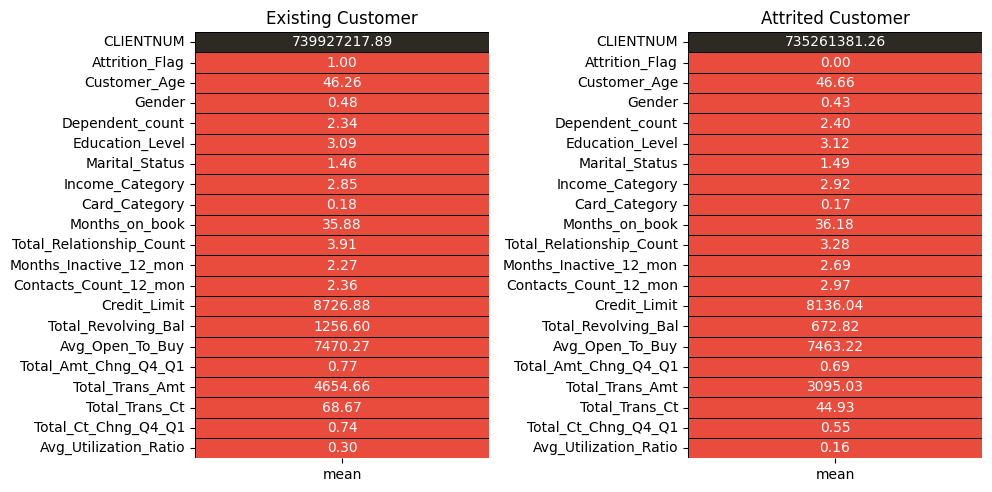

In [69]:
#Realizamos una gráfica para ver los promedios de las variables segun si abandono o no el servicio
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos correctamente
churn = df_copy[df_copy['Attrition_Flag'] == 1].describe().T
not_churn = df_copy[df_copy['Attrition_Flag'] == 0].describe().T

colors = ['#E94B3C', '#2D2923']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Gráfico para clientes que abandonaron el servicio
sns.heatmap(churn[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[0])
ax[0].set_title('Existing Customer')

# Gráfico para clientes que no abandonaron el servicio
sns.heatmap(not_churn[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[1])
ax[1].set_title('Attrited Customer')

plt.tight_layout(pad=1.0)
plt.show()


Estamos creando una copia profunda del conjunto de datos original y codificando las variables de texto. Las modificaciones en el conjunto de datos original no se destacarán en esta copia profunda.

Por lo tanto, usamos esta copia profunda del conjunto de datos que tiene todas las características convertidas en valores numéricos para fines de visualización y modelado. Ahora, nuevamente obtenemos las estadísticas descriptivas de los datos.

Análisis de los resultados:

Promedios de todas las características para clientes que se han dado de baja y clientes que no se han dado de baja.

1. Claramente, los clientes que se dieron de baja tenían una baja tasa media de permanencia de 36,18 meses en comparación con aquellos que continuaron con un período de permanencia promedio de 35,88 meses.

2. Los valores medios de CreditLimit, Total Revolving Bal, Avg_Open_To_Buy y Total_Trans_Amnt son más altos para los clientes que no se dieron de baja que para los clientes que se dieron de baja. ¡Esto puede servir como un buen indicador o punto en el que enfocarse!

3. El valor de las transferencias de los clientes que se dieron de baja es  más bajo que el de los clientes que no se dieron de baja.

4. El promedio de las trasnsferencias mensuales de los clientes que se dieron de baja, 44.93, es mayor que el de los clientes que no se dieron de baja, 68.67.

5. Los TotalCharges de los clientes que no se dieron de baja, 4644,66, son más altos que los de los clientes que se dieron de baja, 3095.03.

6. A partir de estos valores medios, podemos decir que algunas de las características muestran una diferencia clara que puede ayudar a enfocarse más en los clientes que se dieron de baja para asegurarse de que retengan los servicios.


In [70]:
df_copy.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.839340,46.325960,0.470919,2.346203,3.096574,1.463415,2.863928,0.179816,35.928409,...,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,0.367235,8.016814,0.499178,1.298908,1.834812,0.737808,1.504700,0.693039,7.986416,...,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,...,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,1.000000,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,31.000000,...,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,1.000000,46.000000,0.000000,2.000000,3.000000,1.000000,3.000000,0.000000,36.000000,...,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,1.000000,52.000000,1.000000,3.000000,5.000000,2.000000,4.000000,0.000000,40.000000,...,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,3.000000,56.000000,...,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


<ipython-input-71-d8492a07a319>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Attrition_Flag', data=df, palette=colors, edgecolor='black')
<ipython-input-71-d8492a07a319>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Attrited Customers', 'Existing Customers'])


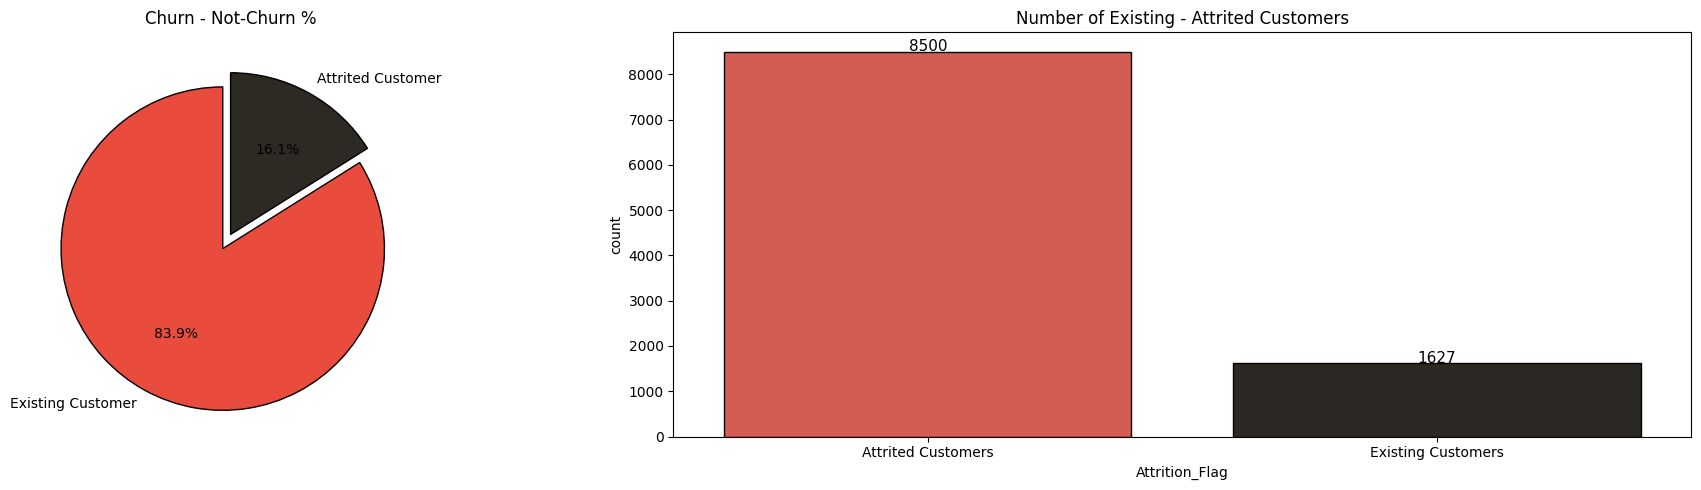

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#E94B3C', '#2D2923']

cant = list(df['Attrition_Flag'].value_counts())
circle = [cant[0] / sum(cant) * 100, cant[1] / sum(cant) * 100]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Primer gráfico - Gráfico de pastel
plt.subplot(1, 2, 1)
plt.pie(circle, labels=['Existing Customer', 'Attrited Customer'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Churn - Not-Churn %')

# Segundo gráfico - Gráfico de barras
plt.subplot(1, 2, 2)
ax = sns.countplot(x='Attrition_Flag', data=df, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['Attrited Customers', 'Existing Customers'])

plt.title('Number of Existing - Attrited Customers')

plt.tight_layout()
plt.show()


El conjunto de datos está desequilibrado en una proporción cercana a 4:1 para clientes Attrited : Existing.

Debido a esto, las predicciones estarán sesgadas hacia los clientes No-Churn.

¡Las visualizaciones también mostrarán este sesgo!

In [72]:
print(df_copy['Attrition_Flag'].value_counts())



1    8500
0    1627
Name: Attrition_Flag, dtype: int64


Definimos el ratio de abandono de clientes, con la siguiente fórmula:

Attrited Customer / Attrited + Existing Customer * 100

In [73]:
import numpy as np

# Calcula el porcentaje de abandono de clientes
churn_percentage = 100 * (df_copy['Attrition_Flag'].value_counts()[0] / (df_copy['Attrition_Flag'].value_counts()[1] + df['Attrition_Flag'].value_counts()[1]))
churn_percentage = np.round(churn_percentage, 1)

# Define códigos de formato ANSI para texto rojo, negrita y subrayado
red_color = '\033[31m'  # Código ANSI para texto rojo
bold = '\033[1m'
underline = '\033[4m'
reset_format = '\033[0m'

# Construye el mensaje con formato
message = f"{red_color}{bold}{underline}El porcentaje de abandono de clientes es: {churn_percentage}%{reset_format}"

# Imprime el mensaje
print(message)


El porcentaje de abandono de clientes es: 16.1%


In [74]:
#realicemos alguno gráficos para nuestro análisis EDA

In [75]:
columns = list(df_copy.columns)

categorical_features = []
numerical_features = []

for feature in columns:
    if df_copy[feature].nunique() > 6:
        numerical_features.append(feature)
    else:
        categorical_features.append(feature)

print('Categorical Features:')
print(', '.join(categorical_features))
print('Numerical Features:')
print(', '.join(numerical_features))

Categorical Features:
Attrition_Flag, Gender, Dependent_count, Marital_Status, Income_Category, Card_Category, Total_Relationship_Count
Numerical Features:
CLIENTNUM, Customer_Age, Education_Level, Months_on_book, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio


<ipython-input-76-ace1575687a4>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(initials)


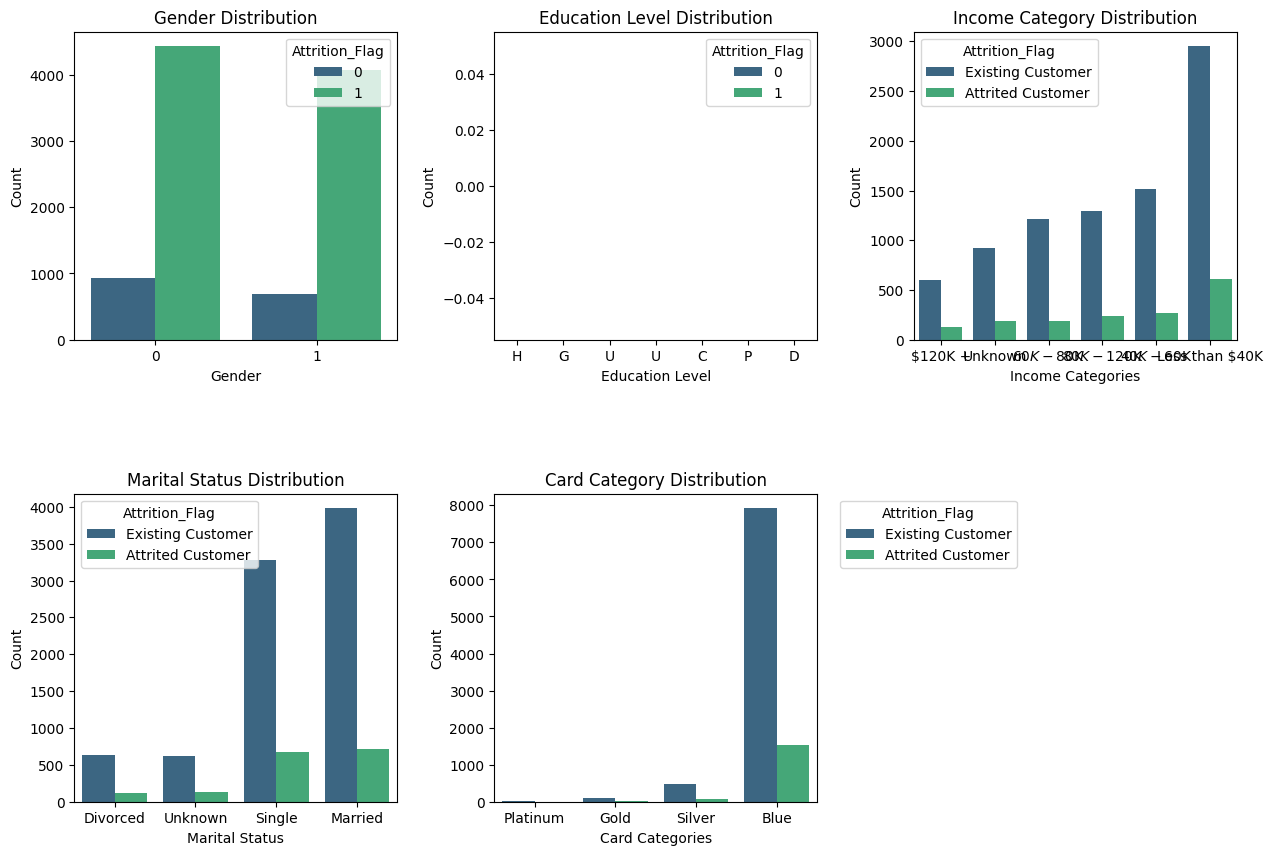

In [76]:


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Crea una figura con 2 filas y 3 columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Ajusta el espacio entre subgráficos
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Gráfico 1: Gender Distribution
ax1 = plt.subplot(2, 3, 1)
sns.countplot(data=df_copy, x='Gender', hue='Attrition_Flag', palette='viridis', ax=ax1)
ax1.set_title('Gender Distribution')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')

# Gráfico 2: Education Level Distribution

# Crear un subplot con 2 filas y 3 columnas, y seleccionar el segundo subplot
ax2 = plt.subplot(2, 3, 2)
sns.countplot(data=df_copy, x='Education_Level', hue='Attrition_Flag', palette='viridis',
              order=df['Education_Level'].value_counts(ascending=True).index, ax=ax2)
ax2.set_title('Education Level Distribution')
ax2.set_xlabel('Education Level')
ax2.set_ylabel('Count')
initials = [level[0] if isinstance(level, str) else level for level in df['Education_Level'].unique()]
ax2.set_xticklabels(initials)



# Gráfico 3: Income Category Distribution
ax3 = plt.subplot(2, 3, 3)
sns.countplot(data=df, x='Income_Category', hue='Attrition_Flag', palette='viridis',
              order=df['Income_Category'].value_counts(ascending=True).index, ax=ax3)
ax3.set_title('Income Category Distribution')
ax3.set_xlabel('Income Categories')
ax3.set_ylabel('Count')

# Gráfico 4: Marital Status Distribution
ax4 = plt.subplot(2, 3, 4)
sns.countplot(data=df, x='Marital_Status', hue='Attrition_Flag', palette='viridis',
              order=df['Marital_Status'].value_counts(ascending=True).index, ax=ax4)
ax4.set_title('Marital Status Distribution')
ax4.set_xlabel('Marital Status')
ax4.set_ylabel('Count')

# Gráfico 5: Card Category Distribution
ax5 = plt.subplot(2, 3, 5)
sns.countplot(data=df, x='Card_Category', hue='Attrition_Flag', palette='viridis',
              order=df['Card_Category'].value_counts(ascending=True).index, ax=ax5)
ax5.set_title('Card Category Distribution')
ax5.set_xlabel('Card Categories')
ax5.set_ylabel('Count')

# Elimina el sexto gráfico vacío
fig.delaxes(axes[1, 2])

# Añade la leyenda
plt.legend(title='Attrition_Flag', bbox_to_anchor=(1.05, 1), loc='upper left')

# Muestra la figura
plt.show()

De los gráficos podemos extraer las siguientes conclusiones:
Los clientes que abandonan son muchos menos de los que se quedan. Suponen menos de un 20% de los clientes.

El abandono es alto en la categoría de tarjeta azul.

Los ratios de abandono son similares en hombres y mujeres.

El abandono es menor en los ingresos menores de 40K.

El nivel educativo no parece tener mucho efecto entre la escuela secundaria y los graduados.


Veamos ahora si existe correlación entre variables.

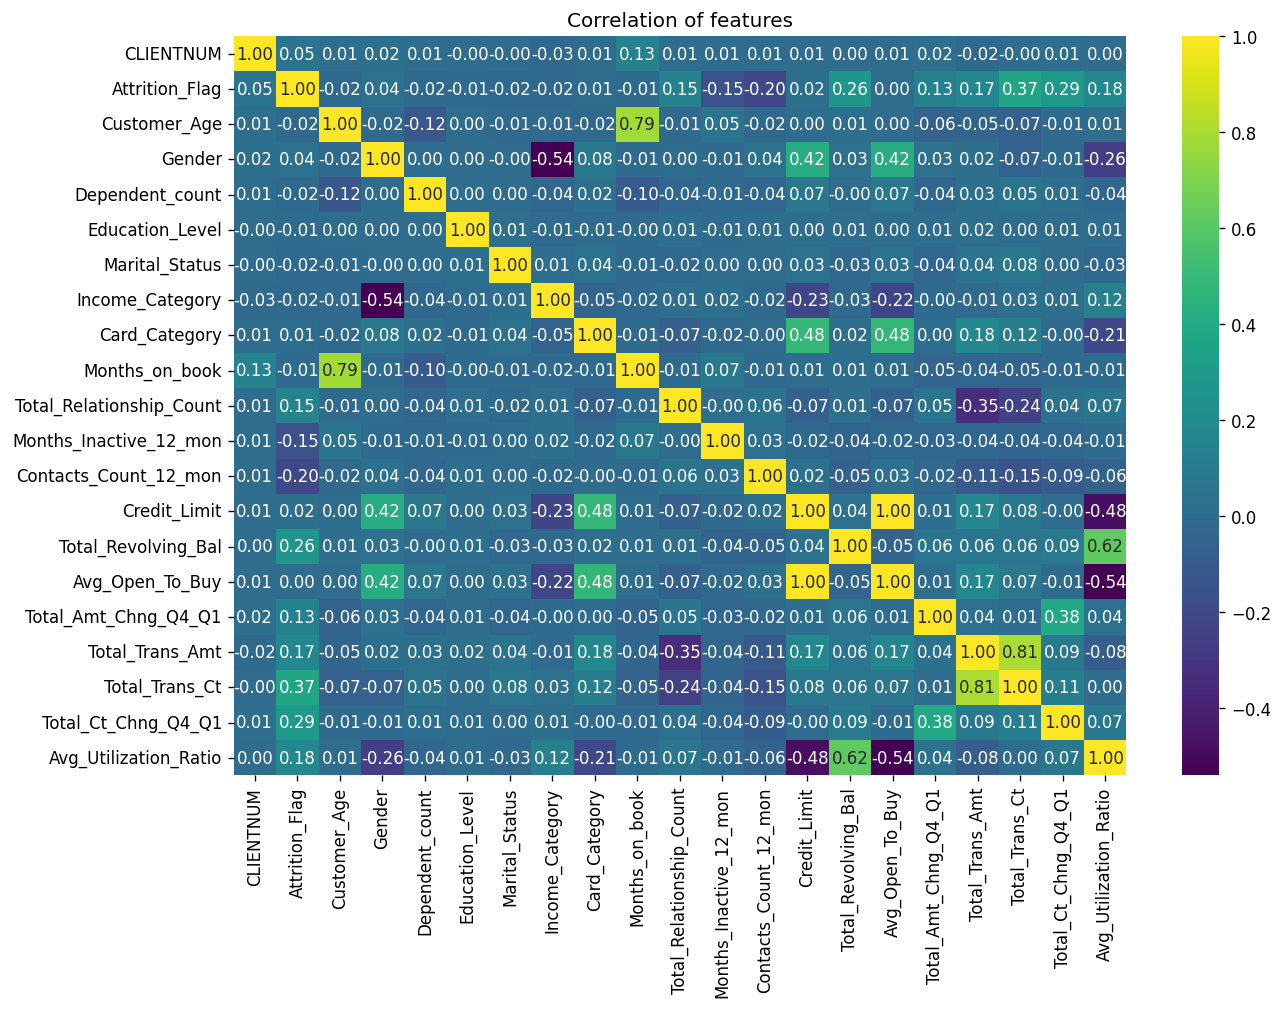

In [77]:
plt.figure(figsize=(12,8), dpi= 120)
plt.title("Correlation of features")
sns.heatmap(df_copy.corr(), cmap='viridis', annot=True, fmt='.2f');


<ipython-input-78-697582103cf8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy[numerical_features[i]],color = colors[0])
<ipython-input-78-697582103cf8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy[numerical_features[i]],color = colors[0])
<ipython-input-78-697582103cf8>:4:

ValueError: num must be an integer with 1 <= num <= 3, not 4

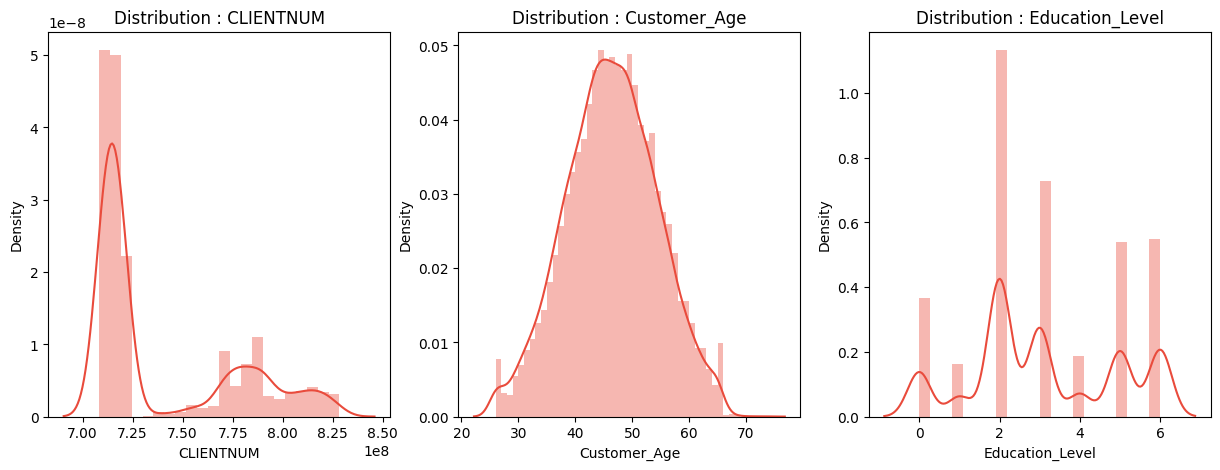

In [78]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df_copy[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

- La edad del cliente y los meses registrados tienen una correlación positiva
 - El límite de crédito y Avg_Open_To_Buy están altamente correlacionados
 - Total_Revolving_Bal y Avg_Utilization_Rate están relacionados positivamente
 - Total_Trans_Amt y Total_Trans_Ct también tienen una correlación positiva

El género del cliente y la categoría de ingresos, correlacionan negativamente

/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(x=x, y=y, **kws)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(x=x, y=y, **kws)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:433: UserWarning: *c* argument looks like a single numeric RGB or 

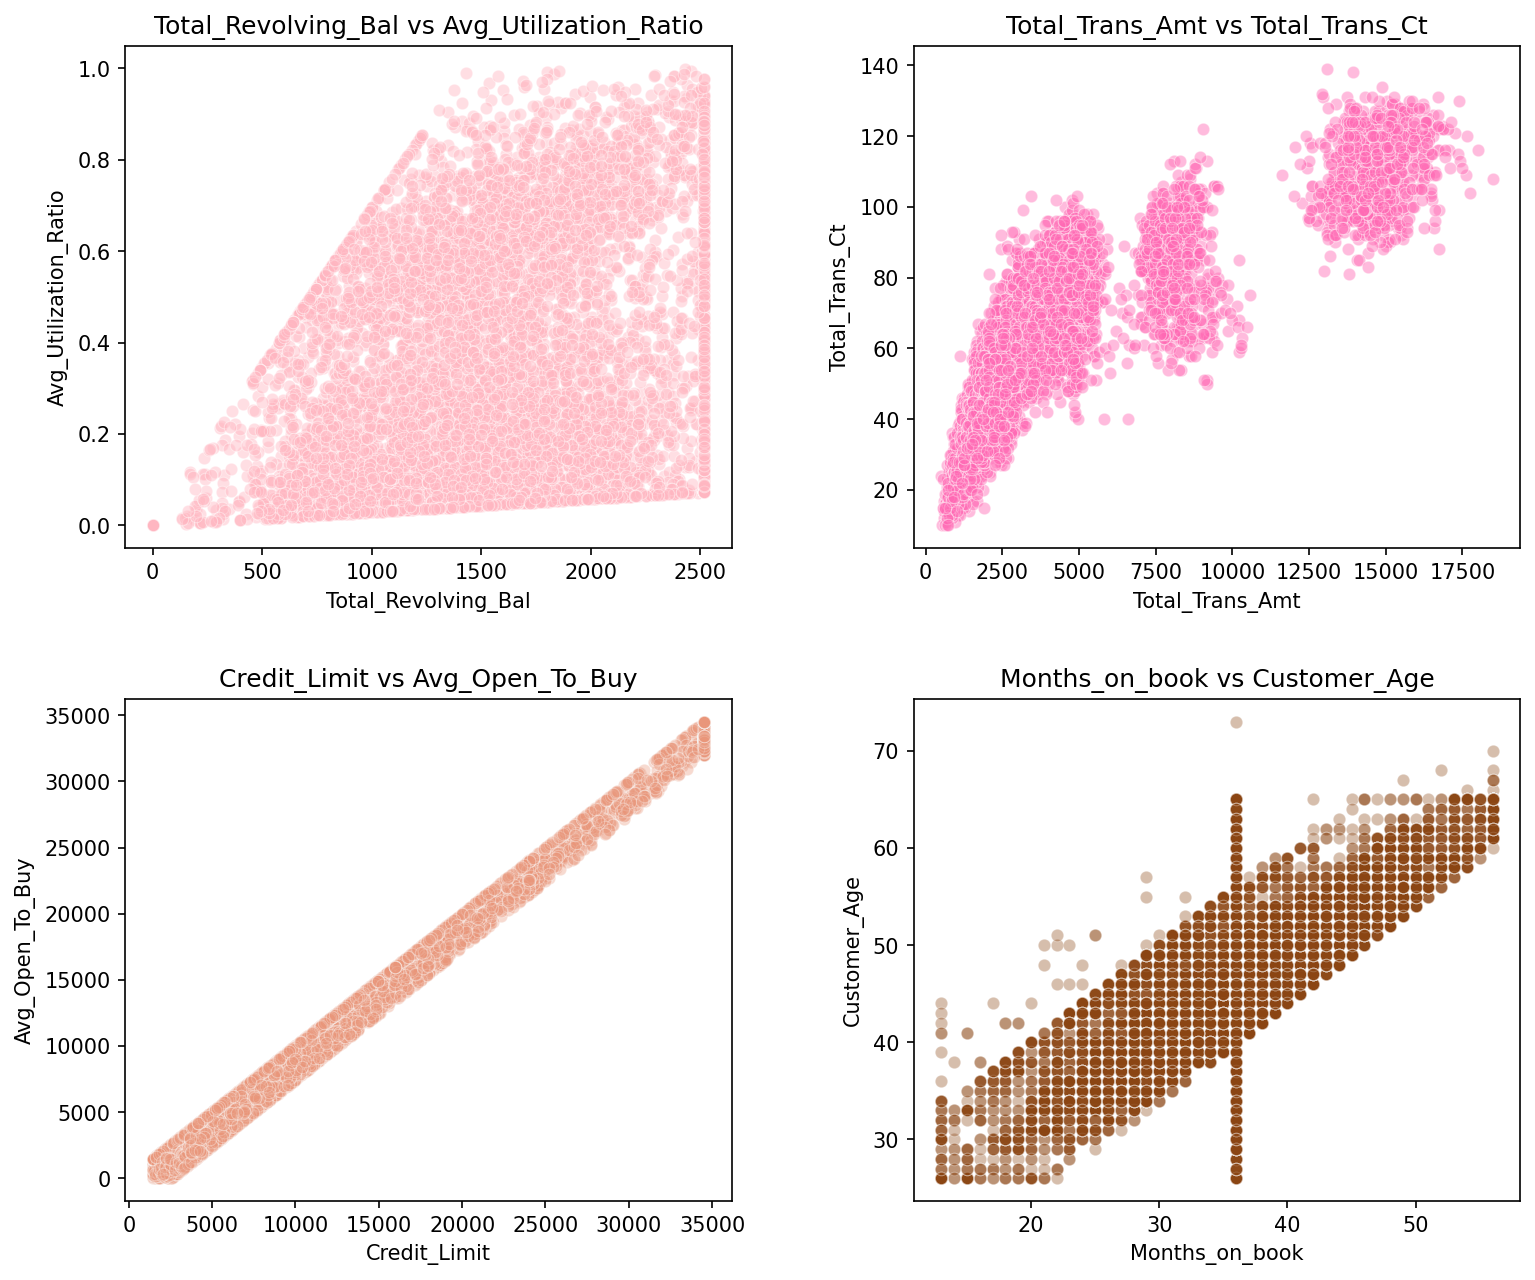

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con 2 filas y 2 columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), dpi=150)

# Ajustar el espacio entre subgráficos
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Paleta de colores con tonos rosas y marrones
palette_pink_brown = sns.color_palette(["#FFB6C1", "#FF69B4", "#E9967A", "#8B4513"])

# Gráfico 1
sns.scatterplot(data=df_copy, x='Total_Revolving_Bal', y='Avg_Utilization_Ratio', alpha=0.45, ax=axes[0, 0], c=palette_pink_brown[0])
axes[0, 0].set_title('Total_Revolving_Bal vs Avg_Utilization_Ratio')

# Gráfico 2
sns.scatterplot(data=df_copy, x='Total_Trans_Amt', y='Total_Trans_Ct', alpha=0.45, ax=axes[0, 1], c=palette_pink_brown[1])
axes[0, 1].set_title('Total_Trans_Amt vs Total_Trans_Ct')

# Gráfico 3
sns.scatterplot(data=df_copy, x='Credit_Limit', y='Avg_Open_To_Buy', alpha=0.35, ax=axes[1, 0], c=palette_pink_brown[2])
axes[1, 0].set_title('Credit_Limit vs Avg_Open_To_Buy')

# Gráfico 4
sns.scatterplot(data=df_copy, x='Months_on_book', y='Customer_Age', alpha=0.35, ax=axes[1, 1], c=palette_pink_brown[3])
axes[1, 1].set_title('Months_on_book vs Customer_Age')

# Mostrar la figura
plt.show()

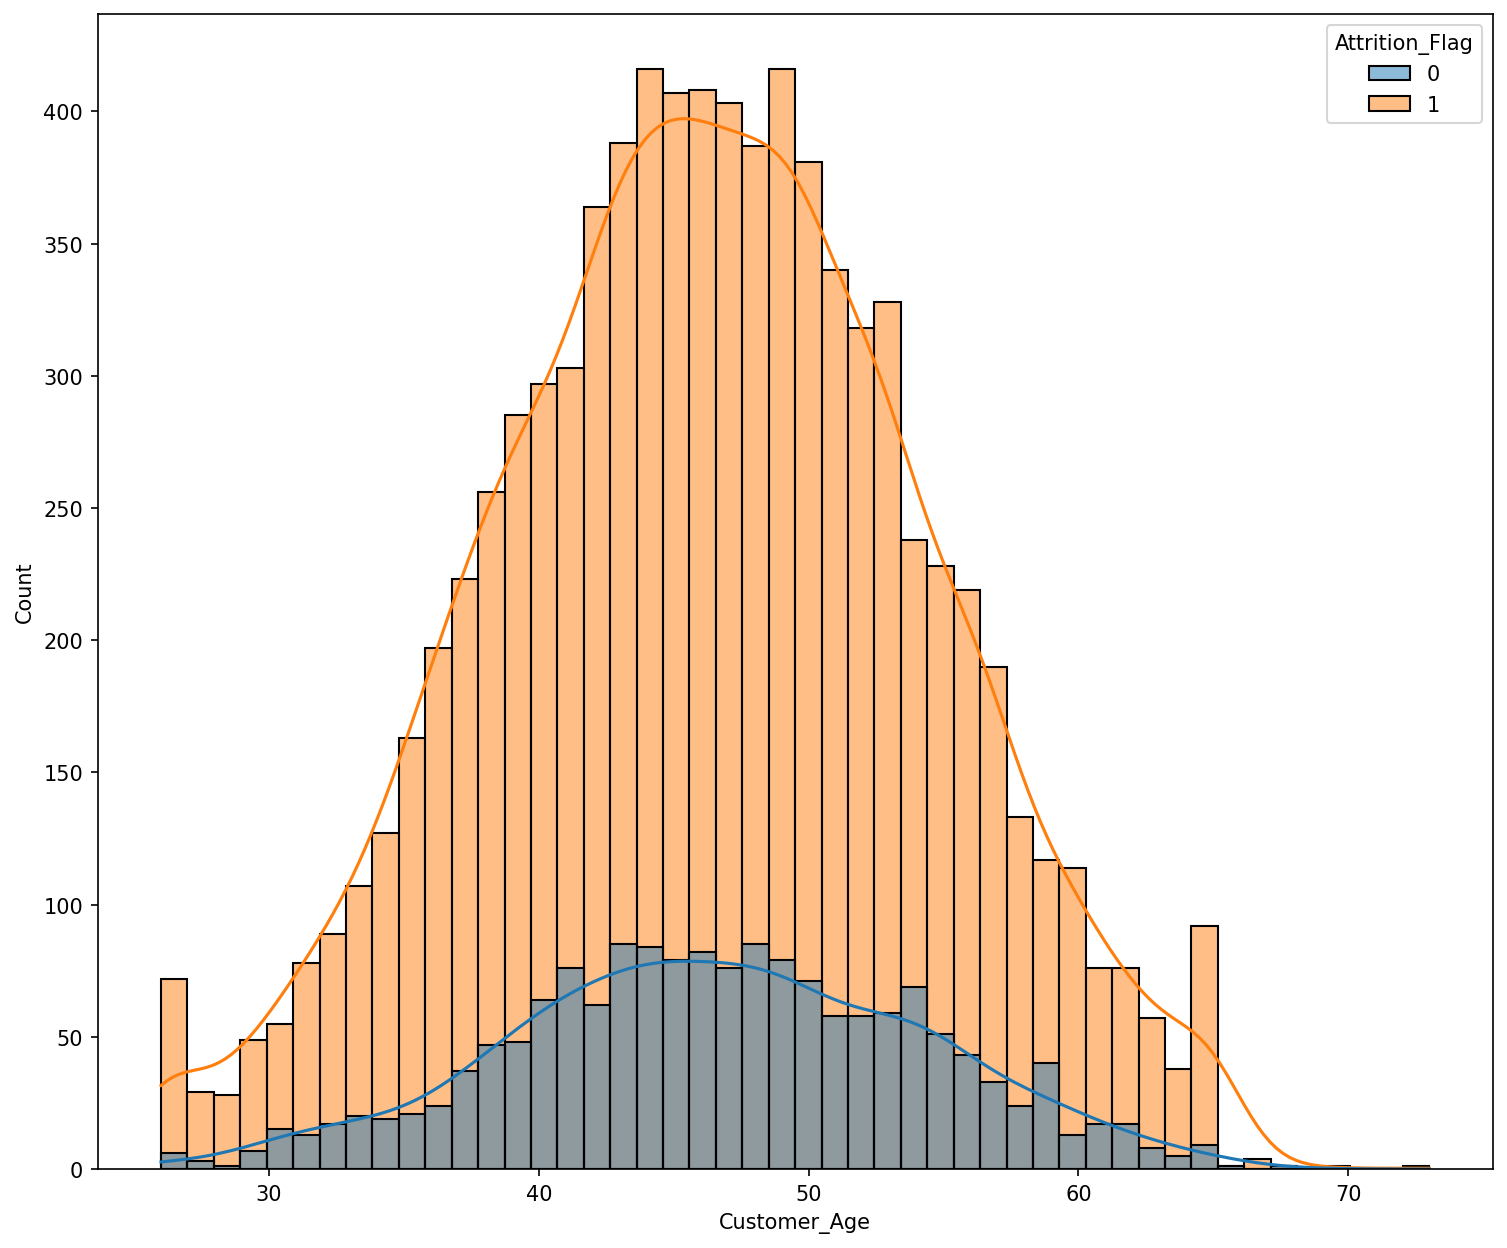

In [80]:
plt.figure(figsize=(12,10), dpi=150)
sns.histplot(df_copy, x='Customer_Age', hue='Attrition_Flag', bins=48, kde=True);

## 6. Desarrollo de la solución y experimentos realizados <a class="anchor" id="6"></a>
Describe de manera general la solución desarrollada (fases realizadas como preprocesamiento, modelado, interpretación...).  Deberías incluir todo lo necesario para generar una solución para el problema (detalles sobre la instalación de librerías adicionales, código y explicaciones). Aquí también se incluyen las comparativas y experimentos realizados para elegir los componentes de la solución final. Es decir, se detallará e implementará el particionamiento de datos escogido, el preprocesamiento realizado, la comparativa de los diferentes métodos probados junto con la elección de sus híper-parámetros, la evaluación de resultados y la interpretación del modelo final.

In [81]:
pip install --upgrade pandas


**##TRANSFORMACION DE DATOS##**

Hasta ahora hemos visto cómo realizar una transformación común a todas las variables categóricas. Sin embargo, puede ser interesante realizar diferentes transformaciones (o procesos de preparación de datos) según las características de las variables.

Imaginad que dentro de un problema algunas de las variables categóricas tienen muchos posibles valores y otras sólo unos pocos. Puede ser interesante aplicar una transformación *One hot* a las variables con pocos valores y una basada en la salida para las que tienen muchos y, de esta forma, evitar generar una matriz dispersa.

Para poder realizarlo, *Scikit-learn* provee la clase [*ColumnTransformer*](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer) mediante la que se pueden aplicar determinadas transformaciones a determinadas variables. Para ello, en el híper-parámetro *transformers* se debe especificar una lista de tuplas en la que en cada tupla se determina el nombre de la transformación, la transformación a aplicar y las variables sobre las que aplicarla

    (nombreTransformación, transformación, ListaVariables)

In [82]:
from sklearn.compose import ColumnTransformer

In [83]:
pip install category_encoders


In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from category_encoders import TargetEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [85]:
from sklearn.model_selection import train_test_split

X = df_copy.drop('Attrition_Flag', axis=1)
y= df_copy['Attrition_Flag']
y=OrdinalEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
##Para separar un DataFrame en dos, uno para las características (X) y otro para la variable objetivo (y), puedes utilizar la indexación de columnas en pandas.

# Creamos el DataFrame de características X, excluyendo la columna 'Attrition_Flag'
X = df_copy.drop(columns=['Attrition_Flag'])

# Creamos el DataFrame de la variable objetivo y
y = df_copy['Attrition_Flag']

In [87]:
# Obtenemos la lista de nombres de variables categóricas con más de 3 valores diferentes
varCatMayor3 = [v for i, v in enumerate(X.columns) if ((len(X[v].unique())>3) & (X.dtypes[i] == 'object')) ]
print(varCatMayor3)
# Obtenemos la lista de nombres de variables categóricas con 3 o menos valores diferentes
varCatMenorIgual3 = [v for i, v in enumerate(X.columns) if ((len(df[v].unique())<=3) & (X.dtypes[i] == 'object')) ]
print(varCatMenorIgual3)

[]
[]


In [88]:
# Definimos una Pipeline de operaciones para las variables categóricas de más de 3 valores
TransformacionMayor3 = Pipeline([
    ('enc', TargetEncoder(smoothing=0.0000001))
])

In [89]:
# Definimos una Pipeline de operaciones para las variables categóricas de 3 o menos valores
TransformacionMenorIgual3 = Pipeline([
    ('enc', OneHotEncoder())

])

In [90]:
# Creamos el objeto de la clase ColumnTransformer en la que indicamos qué operaciones hacer a qué variables
preprocesamiento = ColumnTransformer(
    transformers=[
        ('CategoricasMayor3', TransformacionMayor3, varCatMayor3),
        ('CategoricasMenorIgual3', TransformacionMenorIgual3, varCatMenorIgual3)],
     remainder='passthrough')


In [91]:
# Creamos una Pipeline para resolver el problema de predicción
clf = Pipeline([
    ('preprocesamiento', preprocesamiento),
    ('scaler',MinMaxScaler()),
    ('clasificador', LogisticRegression(solver='lbfgs', max_iter=1500, multi_class='auto', random_state=123456789))
])

In [92]:
print (type(y_train))

<class 'pandas.core.frame.DataFrame'>


In [93]:
##Entrenamos la pipeline
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('CategoricasMayor3',
                                                  Pipeline(steps=[('enc',
                                                                   TargetEncoder(smoothing=1e-07))]),
                                                  []),
                                                 ('CategoricasMenorIgual3',
                                                  Pipeline(steps=[('enc',
                                                                   OneHotEncoder())]),
                                                  [])])),
                ('scaler', MinMaxScaler()),
                ('clasificador',
                 LogisticRegression(max_iter=1500, random_state=123456789))])

In [94]:
print("Accuracy del modelo en train {:.2f}%".format(clf.score(X_train, y_train['Attrition_Flag'].tolist())*100))
print("Accuracy del modelo en test {:.2f}%".format(clf.score(X_test, y_test['Attrition_Flag'].tolist())*100))

Accuracy del modelo en train 90.55%
Accuracy del modelo en test 89.63%


Al igual que en el resto de Pipelines, se pueden conseguir los mejores valores de los híper-parámetros utilizando *GridSearchCV*. Como el objeto final es complicado, para conocer los nombres de los híper-parámetros susceptibles de ser tratados podemos ejecutar la siguiente línea de código.

In [95]:
# Mostramos los nombres de los híper-parámetros
    # Con ellos se puede generar el diccionario de valores para utilizar GridSearchCV
clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocesamiento', 'scaler', 'clasificador', 'preprocesamiento__n_jobs', 'preprocesamiento__remainder', 'preprocesamiento__sparse_threshold', 'preprocesamiento__transformer_weights', 'preprocesamiento__transformers', 'preprocesamiento__verbose', 'preprocesamiento__verbose_feature_names_out', 'preprocesamiento__CategoricasMayor3', 'preprocesamiento__CategoricasMenorIgual3', 'preprocesamiento__CategoricasMayor3__memory', 'preprocesamiento__CategoricasMayor3__steps', 'preprocesamiento__CategoricasMayor3__verbose', 'preprocesamiento__CategoricasMayor3__enc', 'preprocesamiento__CategoricasMayor3__enc__cols', 'preprocesamiento__CategoricasMayor3__enc__drop_invariant', 'preprocesamiento__CategoricasMayor3__enc__handle_missing', 'preprocesamiento__CategoricasMayor3__enc__handle_unknown', 'preprocesamiento__CategoricasMayor3__enc__hierarchy', 'preprocesamiento__CategoricasMayor3__enc__min_samples_leaf', 'preprocesamiento__CategoricasMayor3__enc__return_

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
print(df_copy,y_train.keys())


       CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0      768805383               1            45       1                3   
1      818770008               1            49       0                5   
2      713982108               1            51       1                3   
3      769911858               1            40       0                4   
4      709106358               1            40       1                3   
...          ...             ...           ...     ...              ...   
10122  772366833               1            50       1                2   
10123  710638233               0            41       1                2   
10124  716506083               0            44       0                1   
10125  717406983               0            30       1                2   
10126  714337233               0            43       0                2   

       Education_Level  Marital_Status  Income_Category  Card_Category  \
0                    3   

In [98]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

    # Ejemplo de cómo establer los híper-parámetros
parámetros={'memory', 'steps', 'verbose', 'preprocesamiento', 'scaler', 'clasificador', 'preprocesamiento__n_jobs', 'preprocesamiento__remainder', 'preprocesamiento__sparse_threshold', 'preprocesamiento__transformer_weights', 'preprocesamiento__transformers', 'preprocesamiento__verbose', 'preprocesamiento__verbose_feature_names_out', 'preprocesamiento__CategoricasMayor3', 'preprocesamiento__CategoricasMenorIgual3', 'preprocesamiento__CategoricasMayor3__memory', 'preprocesamiento__CategoricasMayor3__steps', 'preprocesamiento__CategoricasMayor3__verbose', 'preprocesamiento__CategoricasMayor3__enc', 'preprocesamiento__CategoricasMayor3__enc__cols', 'preprocesamiento__CategoricasMayor3__enc__drop_invariant', 'preprocesamiento__CategoricasMayor3__enc__handle_missing', 'preprocesamiento__CategoricasMayor3__enc__handle_unknown', 'preprocesamiento__CategoricasMayor3__enc__hierarchy', 'preprocesamiento__CategoricasMayor3__enc__min_samples_leaf', 'preprocesamiento__CategoricasMayor3__enc__return_df', 'preprocesamiento__CategoricasMayor3__enc__smoothing', 'preprocesamiento__CategoricasMayor3__enc__verbose', 'preprocesamiento__CategoricasMenorIgual3__memory', 'preprocesamiento__CategoricasMenorIgual3__steps', 'preprocesamiento__CategoricasMenorIgual3__verbose', 'preprocesamiento__CategoricasMenorIgual3__enc', 'preprocesamiento__CategoricasMenorIgual3__enc__categories', 'preprocesamiento__CategoricasMenorIgual3__enc__drop', 'preprocesamiento__CategoricasMenorIgual3__enc__dtype', 'preprocesamiento__CategoricasMenorIgual3__enc__handle_unknown', 'preprocesamiento__CategoricasMenorIgual3__enc__max_categories', 'preprocesamiento__CategoricasMenorIgual3__enc__min_frequency', 'preprocesamiento__CategoricasMenorIgual3__enc__sparse', 'preprocesamiento__CategoricasMenorIgual3__enc__sparse_output', 'scaler__clip', 'scaler__copy', 'scaler__feature_range', 'clasificador__C', 'clasificador__class_weight', 'clasificador__dual', 'clasificador__fit_intercept', 'clasificador__intercept_scaling', 'clasificador__l1_ratio', 'clasificador__max_iter', 'clasificador__multi_class', 'clasificador__n_jobs', 'clasificador__penalty', 'clasificador__random_state', 'clasificador__solver', 'clasificador__tol', 'clasificador__verbose', 'clasificador__warm_start'}

# Definir los parámetros a buscar en la cuadrícula
parameters_Pipeline = {
    'clasificador__C': [0.1, 1.0],
    'preprocesamiento__CategoricasMenorIgual3__scaler': [MinMaxScaler(feature_range=(0, 1))]
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(clf, parameters_Pipeline, cv=5, n_jobs=-1, verbose=2)



In [130]:
print(grid_search)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('CategoricasMayor3',
                                                                         Pipeline(steps=[('enc',
                                                                                          TargetEncoder(smoothing=1e-07))]),
                                                                         []),
                                                                        ('CategoricasMenorIgual3',
                                                                         Pipeline(steps=[('enc',
                                                                                          OneHotEncoder())]),
                                                                         [])])),
                                       ('scaler', MinMaxS

In [131]:
# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)





Fitting 5 folds for each of 2 candidates, totalling 10 fits


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [132]:
# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

parameters_Pipeline = {
    'clasificador__C': [0.1, 1.0],
    'preprocesamiento__CategoricasMenorIgual3__scaler': [MinMaxScaler(feature_range=(0, 1))],
    'preprocesamiento__CategoricasMayor3_scaler':[MinMaxScaler(feature_range=(0, 1))]
}


# Cremos y ajustamos el objeto GridSearchCV
np.random.seed(12)

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Exactitud del modelo en el conjunto de prueba:", test_accuracy)



Mejores hiperparámetros encontrados:


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [133]:
print(clf)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('CategoricasMayor3',
                                                  Pipeline(steps=[('enc',
                                                                   TargetEncoder(smoothing=1e-07))]),
                                                  []),
                                                 ('CategoricasMenorIgual3',
                                                  Pipeline(steps=[('enc',
                                                                   OneHotEncoder())]),
                                                  [])])),
                ('scaler', MinMaxScaler()),
                ('clasificador',
                 LogisticRegression(max_iter=1500, random_state=123456789))])


In [134]:
# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Exactitud del modelo en el conjunto de prueba:", test_accuracy)

Mejores hiperparámetros encontrados:


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [137]:
# Imprimir los mejores resultados y las puntuaciones de todas las configuraciones
print(clf.clasificador)
print(clf.preprocesamiento__CategoricasMenorIgual3__scaler__feature_range)
resultadosMostrar = zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'], clf.cv_results_['mean_train_score'])
for params, mean_test_score, mean_train_score in resultadosMostrar:
    print("%0.3f (Train: %0.3f) for %r" % (mean_test_score, mean_train_score, params))
    print()


AttributeError: 'Pipeline' object has no attribute 'clasificador'

In [158]:
# Hacer predicciones en el conjunto de prueba
dfpredicciones = clf.predict(X_test)

# Mostrar las predicciones
print(predicciones)

[1 1 1 ... 1 1 1]


In [163]:
print(dfpredicciones.shape)


(3039,)


In [162]:
print(y_train.shape)


(7088, 1)


In [167]:
import numpy as np

# Convertir DataFrame a array unidimensional
y_train_array = y_train.values.ravel()

#Elimino la dimension extra de dfpredicciones
dfpredicciones = dfpredicciones.reshape(-1, 1)




In [171]:
print("Dimensiones de predicciones:", dfpredicciones.shape)
print("Dimensiones de y_train:", y_train_array.shape)


Dimensiones de predicciones: (3039, 1)
Dimensiones de y_train: (7088,)


In [169]:
import pandas as pd

# Crear un DataFrame con las predicciones y los valores reales
df_comparison = pd.DataFrame({'Predicciones': dfpredicciones, 'Valores reales': y_train_array})

# Mostrar el DataFrame
print(df_comparison)


ValueError: Per-column arrays must each be 1-dimensional

In [153]:
import pandas as pd

# Convertir predicciones en lista si es necesario
if isinstance(predicciones, pd.Series):
    predicciones_list = predicciones.tolist()
else:
    predicciones_list = predicciones

# Crear un DataFrame con las predicciones y los valores reales
df_comparison = pd.DataFrame({'Predicciones': predicciones_list, 'Valores reales': y_train})

# Mostrar el DataFrame
print(df_comparison)



ValueError: Data must be 1-dimensional

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

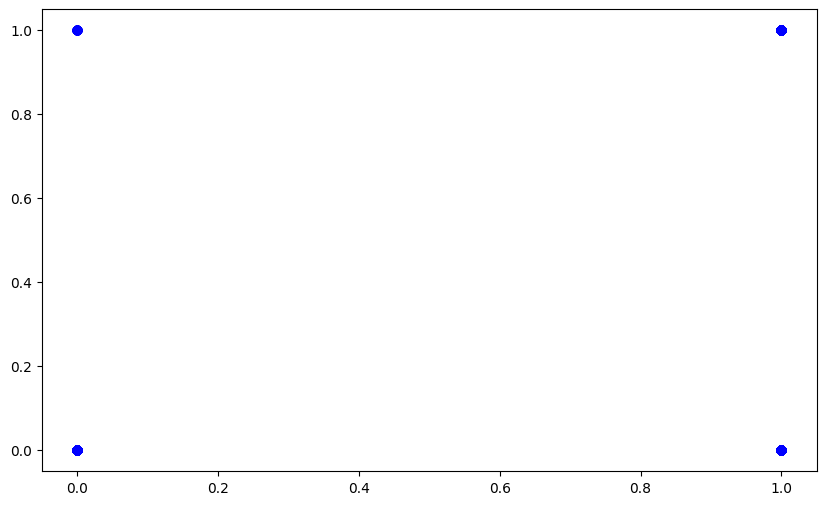

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(predicciones, y_test, color='blue', label='Predicciones vs. Real')
plt.plot([predicciones.min(), y_test.max()], [predicciones.min(), y_test.max()], 'k--', lw=2)  # Línea diagonal (predicciones perfectas)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores reales (Regresión)')
plt.legend()
plt.show()



ENSEMBLES #BAGGING#

Para utilizar Bagging en scikit-learn, disponemos de las clases BaggingRegressor y BaggingClassifier de sklearn.ensemble. Para realizar el entrenamiento utilizaremos las funciones fit y predict como habitualmente. Los principales parámetros que tienen estas clase son los siguientes:

base_estimator: El modelo que se va a utilizar como estimador base. Por defecto, un árbol de decisión.

n_estimators: El número de estimadores base del ensemble. Por defecto, 10.

max_samples: Número que indica el número de ejemplos que tendrá cada re-muestreo. Este parámetro admite un número entero, indicando el número exacto de ejemplos, o un float, indicando el porcentaje del número de ejemplos totales con el que queremos trabajar. Por defecto, 1.0: utilizamos tantos ejemplos en el re-muestreo como tenemos en el conjunto original.

bootstrap: Valor booleano que indica si queremos hacer el re-muestreo con o sin reemplazamiento. Por defecto, True.

random_state: Número entero que se usa de semilla para conseguir resultados reproducibles en llamadas sucesivas a la función.

Una vez se ha entrenado el modelo se puede acceder a cada uno de los re-muestreos mediante el atributo estimators_samples_ y a cada uno de los estimadores base mediante el atributo estimators_, entre otras opciones.


In [113]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap




In [107]:
clasificadorBase = DecisionTreeClassifier(criterion='entropy',max_depth=1)
numClasificadoresBase = 5

bagging = BaggingClassifier(clasificadorBase, n_estimators=numClasificadoresBase, random_state=12)

bagging.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=1),
                  n_estimators=5, random_state=12)

In [108]:
# Lista para almacenar el accuracy de cada clasificador base
listaAcc = []
# Por cada clasificador base
for i in range(len(bagging.estimators_)):
    # Se calcula el porcentaje de acierto del clasificador base correspondiente: adaboost.estimators_[i]
    acc = round(accuracy_score(bagging.estimators_[i].predict(X), y)*100.0, 2)
    listaAcc.append(acc)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [115]:
# Definimos una función para representar lsa fronteras de decisión de un clasificador sobre datos en el plano
def plot_clf(X_train, y_train, clasificador=None, title=None, labels=None, features=None):
    # Creamos los mapas de colores a utilizar
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#FFFF00', '#0000FF'])

    # Creamos la figura
    plt.figure(figsize=(10,8))

    # Primer plot a la izquierda
    plt.subplot(111)

    if clasificador is not None:
        # Preparamos los ejemplos de entrada para poder pintar la frontera de decisión
        # Asignamos una clase (color) a cada ejemplo de la malla en [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X_train[:, 0].min() * 0.9-0.05, X_train[:, 0].max() * 1.1
        y_min, y_max = X_train[:, 1].min() * 0.9-0.05, X_train[:, 1].max() * 1.1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))

        if features is not None: # si utilizamos un subconjunto de las características
            # Clasificamos los puntos utilizando las características seleccionadas
            Z = clasificador.predict(np.c_[xx.ravel(), yy.ravel()][:,features])
        else:
            # Clasificamos los puntos utilizando las dos características
            Z = clasificador.predict(np.c_[xx.ravel(), yy.ravel()])

        # Ponemos el resultado en el formato deseado
        Z = Z.reshape(xx.shape)

        # Pintamos las fronteras
        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.7)

    # Pintamos los puntos
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, s=60)
    # Asignamos el título
    if labels is None:
        plt.xlabel('Variable 1')
        plt.ylabel('Variable 2')
    else:
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
    if title is None:
        plt.title("Ejemplos de Train")
    else:
        # Establecemos el título recibido como parámetro
        plt.title(title)

    if clasificador is not None:
        # Establecemos los límites
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())

    # Mostramos la figura
    plt.show()
    return

In [128]:
X_train.shape

(7088, 20)

In [129]:
y_train.shape

(7088, 1)

ValueError: x and y must be the same size

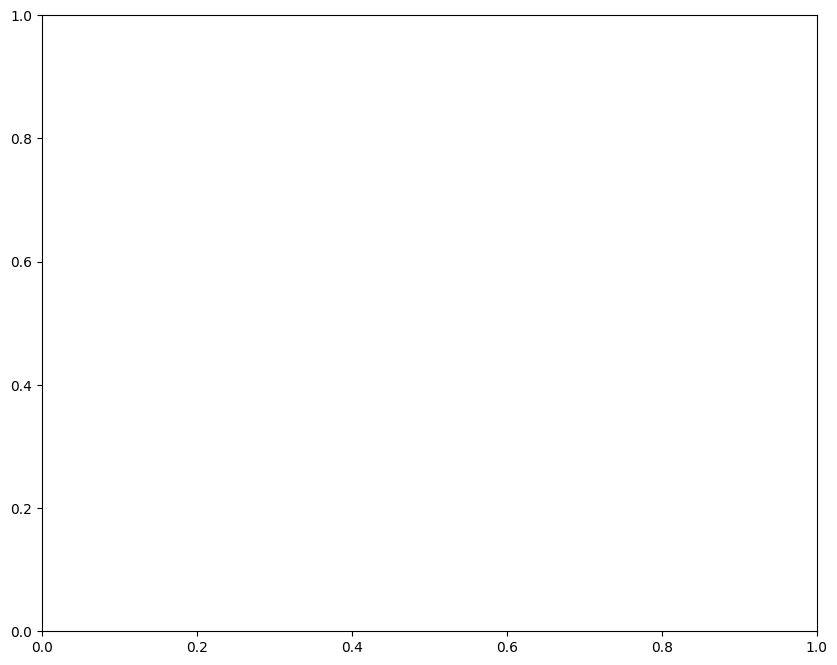

In [138]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Graficamos los ejemplos de entrenamiento
plt.scatter(X_train, y_train, c='b', marker='o', label='Ejemplos de Train')

# Establecemos etiquetas y título
plt.xlabel(labels[0])
plt.ylabel(labels[1])

if title is None:
    plt.title("Ejemplos de Train")
else:
    plt.title(title)

if clasificador is not None:
    # Establecemos los límites según los datos del clasificador
    plt.xlim(X_train.min(), X_train.max())
    plt.ylim(y_train.min(), y_train.max())

# Mostramos la figura
plt.show()


InvalidIndexError: (slice(None, None, None), 0)

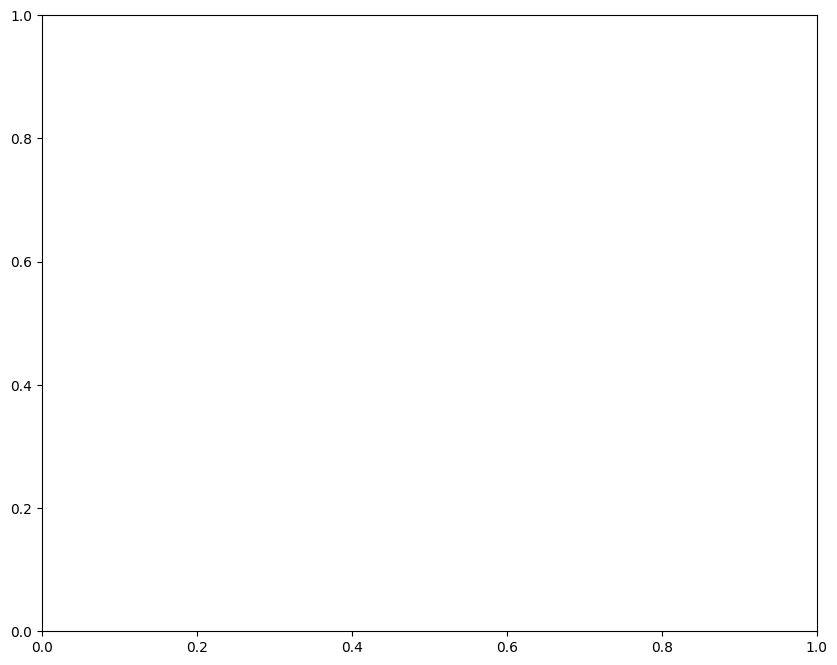

In [139]:

# Establecemos el título de la figura con el número de clasificador y su precisión en train
titulo = 'clasificadorBase {}, accuracy: {}%'.format(i, acc)
# Creamos los mapas de colores a utilizar
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#FFFF00', '#0000FF'])
# Mostramos la figura con los datos de train y la frontera del clasificador correspondiente (bagging.estimators_[i])
plot_clf(X_train, y_train, bagging.estimators_[i], titulo)

# Se calcula el porcentaje de acierto de Bagging
acc = round(accuracy_score(bagging.predict(X), y)*100.0,2)

# Establecemos el título de la figura
titulo = 'Ensemble, accuracy: {}%'.format(acc)
# Mostramos las figura
plot_clf(X_train, y_train, bagging, titulo)

## 7. Resumen de la solución y generalización del modelo <a class="anchor" id="7"></a>

Atendiendo al trabajo realizado en el punto anterior, resume brevemente los pasos realizados para llegar a la solución final y se reporta la capacidad de generalización del modelo así como las conclusiones más importantes obtenidas de su interpretación.

## 8. Líneas futuras <a class="anchor" id="8"></a>

Explica las técnicas o pruebas que se han quedado sin probar por falta de tiempo y que se cree que podrían mejorar la solución obtenida.

Para el futuro, las líneas de actuación serían las siguientes:

-Depurar la pipeline de transformación de variables.

- Estudiar más detalladamente los tipos de transformaciones disponibles, para dar con la más adecuada a nuestro problema.

- Realizar ensembles para probar otros modelos como los árboles de decisión o las SVM.

- Realizar el correcto tuneado del modelo elegido, con GRIDSEARCH.

- Sacar más medidas de rendimiento del modelo.